**Import Libraries**


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn import tree


**Load Data**


In [ ]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   profile pic           576 non-null    int64  
 1   nums/length username  576 non-null    float64
 2   fullname words        576 non-null    int64  
 3   nums/length fullname  576 non-null    float64
 4   name==username        576 non-null    int64  
 5   description length    576 non-null    int64  
 6   external URL          576 non-null    int64  
 7   private               576 non-null    int64  
 8   #posts                576 non-null    int64  
 9   #followers            576 non-null    int64  
 10  #follows              576 non-null    int64  
 11  fake                  576 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 54.1 KB


In [ ]:
train_df.head()

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
0,1,0.27,0,0.0,0,53,0,0,32,1000,955,0
1,1,0.00,2,0.0,0,44,0,0,286,2740,533,0
2,1,0.10,2,0.0,0,0,0,1,13,159,98,0
3,1,0.00,1,0.0,0,82,0,0,679,414,651,0
4,1,0.00,2,0.0,0,0,0,1,6,151,126,0


In [ ]:
test_df.head()

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
0,1,0.33,1,0.33,1,30,0,1,35,488,604,0
1,1,0.00,5,0.00,0,64,0,1,3,35,6,0
2,1,0.00,2,0.00,0,82,0,1,319,328,668,0
3,1,0.00,1,0.00,0,143,0,1,273,14890,7369,0
4,1,0.50,1,0.00,0,76,0,1,6,225,356,0


In [ ]:
train_df.describe()

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
count,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,5.760000e+02,576.000000,576.000000
mean,0.701389,0.163837,1.460069,0.036094,0.034722,22.623264,0.116319,0.381944,107.489583,8.530724e+04,508.381944,0.500000
std,0.458047,0.214096,1.052601,0.125121,0.183234,37.702987,0.320886,0.486285,402.034431,9.101485e+05,917.981239,0.500435
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.900000e+01,57.500000,0.000000
50%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,1.505000e+02,229.500000,0.500000
75%,1.000000,0.310000,2.000000,0.000000,0.000000,34.000000,0.000000,1.000000,81.500000,7.160000e+02,589.500000,1.000000
max,1.000000,0.920000,12.000000,1.000000,1.000000,150.000000,1.000000,1.000000,7389.000000,1.533854e+07,7500.000000,1.000000


In [ ]:
train_df.isnull().sum()

,0
profile pic,0
nums/length username,0
fullname words,0
nums/length fullname,0
name==username,0
description length,0
external URL,0
private,0
#posts,0
#followers,0


**Data Visualization**


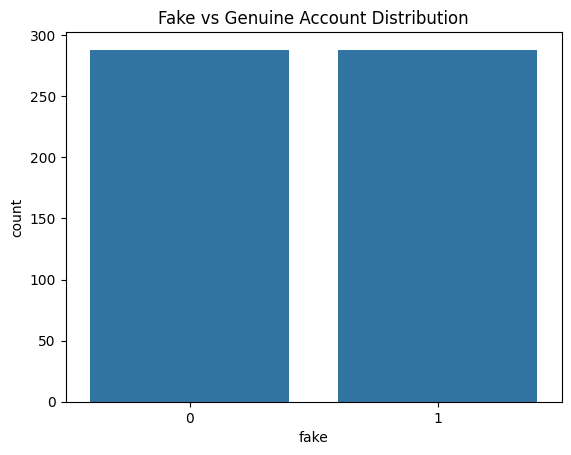

In [ ]:
# Distribution of fake accounts
sns.countplot(x='fake', data=train_df)
plt.title("Fake vs Genuine Account Distribution")
plt.show()

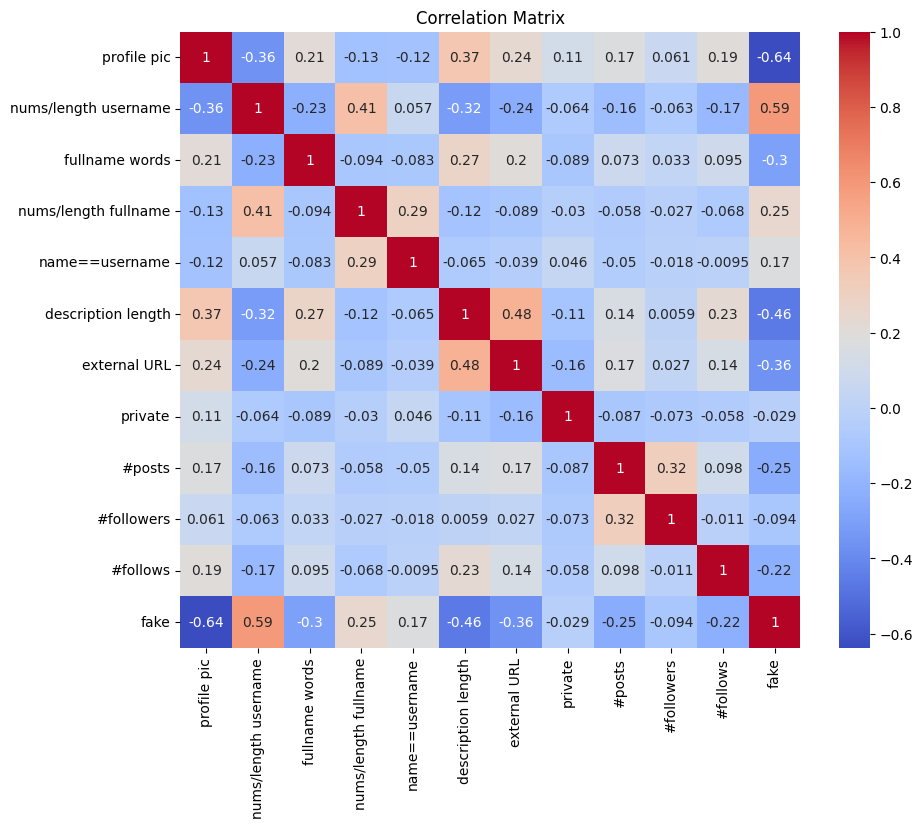

In [ ]:
# Heatmap for correlation
plt.figure(figsize=(10,8))
sns.heatmap(train_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

**Data Preprocessing**

In [ ]:
# Drop non-numeric/binned columns if added earlier
X = train_df.drop('fake', axis=1)
y = train_df['fake']
print(train_df.columns)

Index(['profile pic', 'nums/length username', 'fullname words',
       'nums/length fullname', 'name==username', 'description length',
       'external URL', 'private', '#posts', '#followers', '#follows', 'fake'],
      dtype='object')


In [ ]:
#Optional scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled_df['fake'] = y

**Model Training**

In [ ]:
#train and test
X_train, X_val, y_train, y_val = train_test_split(
    X_scaled_df.drop('fake', axis=1), X_scaled_df['fake'], test_size=0.2, random_state=42
)

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

**Model Evaluation**

In [ ]:
y_pred = model.predict(X_val)

print("Accuracy:", accuracy_score(y_val, y_pred))
print("Classification Report:\n", classification_report(y_val, y_pred))

Accuracy: 0.8706896551724138
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.90      0.88        63
           1       0.88      0.83      0.85        53

    accuracy                           0.87       116
   macro avg       0.87      0.87      0.87       116
weighted avg       0.87      0.87      0.87       116



Confusion Matrix:
 [[57  6]
 [ 9 44]]


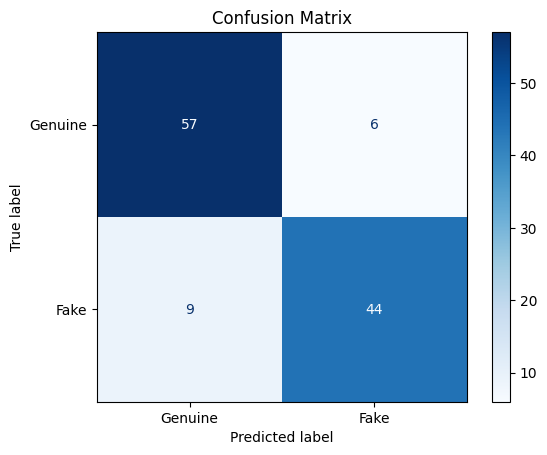

In [ ]:
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred))
# Confusion matrix plot
ConfusionMatrixDisplay.from_predictions(y_val, y_pred, display_labels=['Genuine', 'Fake'], cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

**Decision tree Visualization**

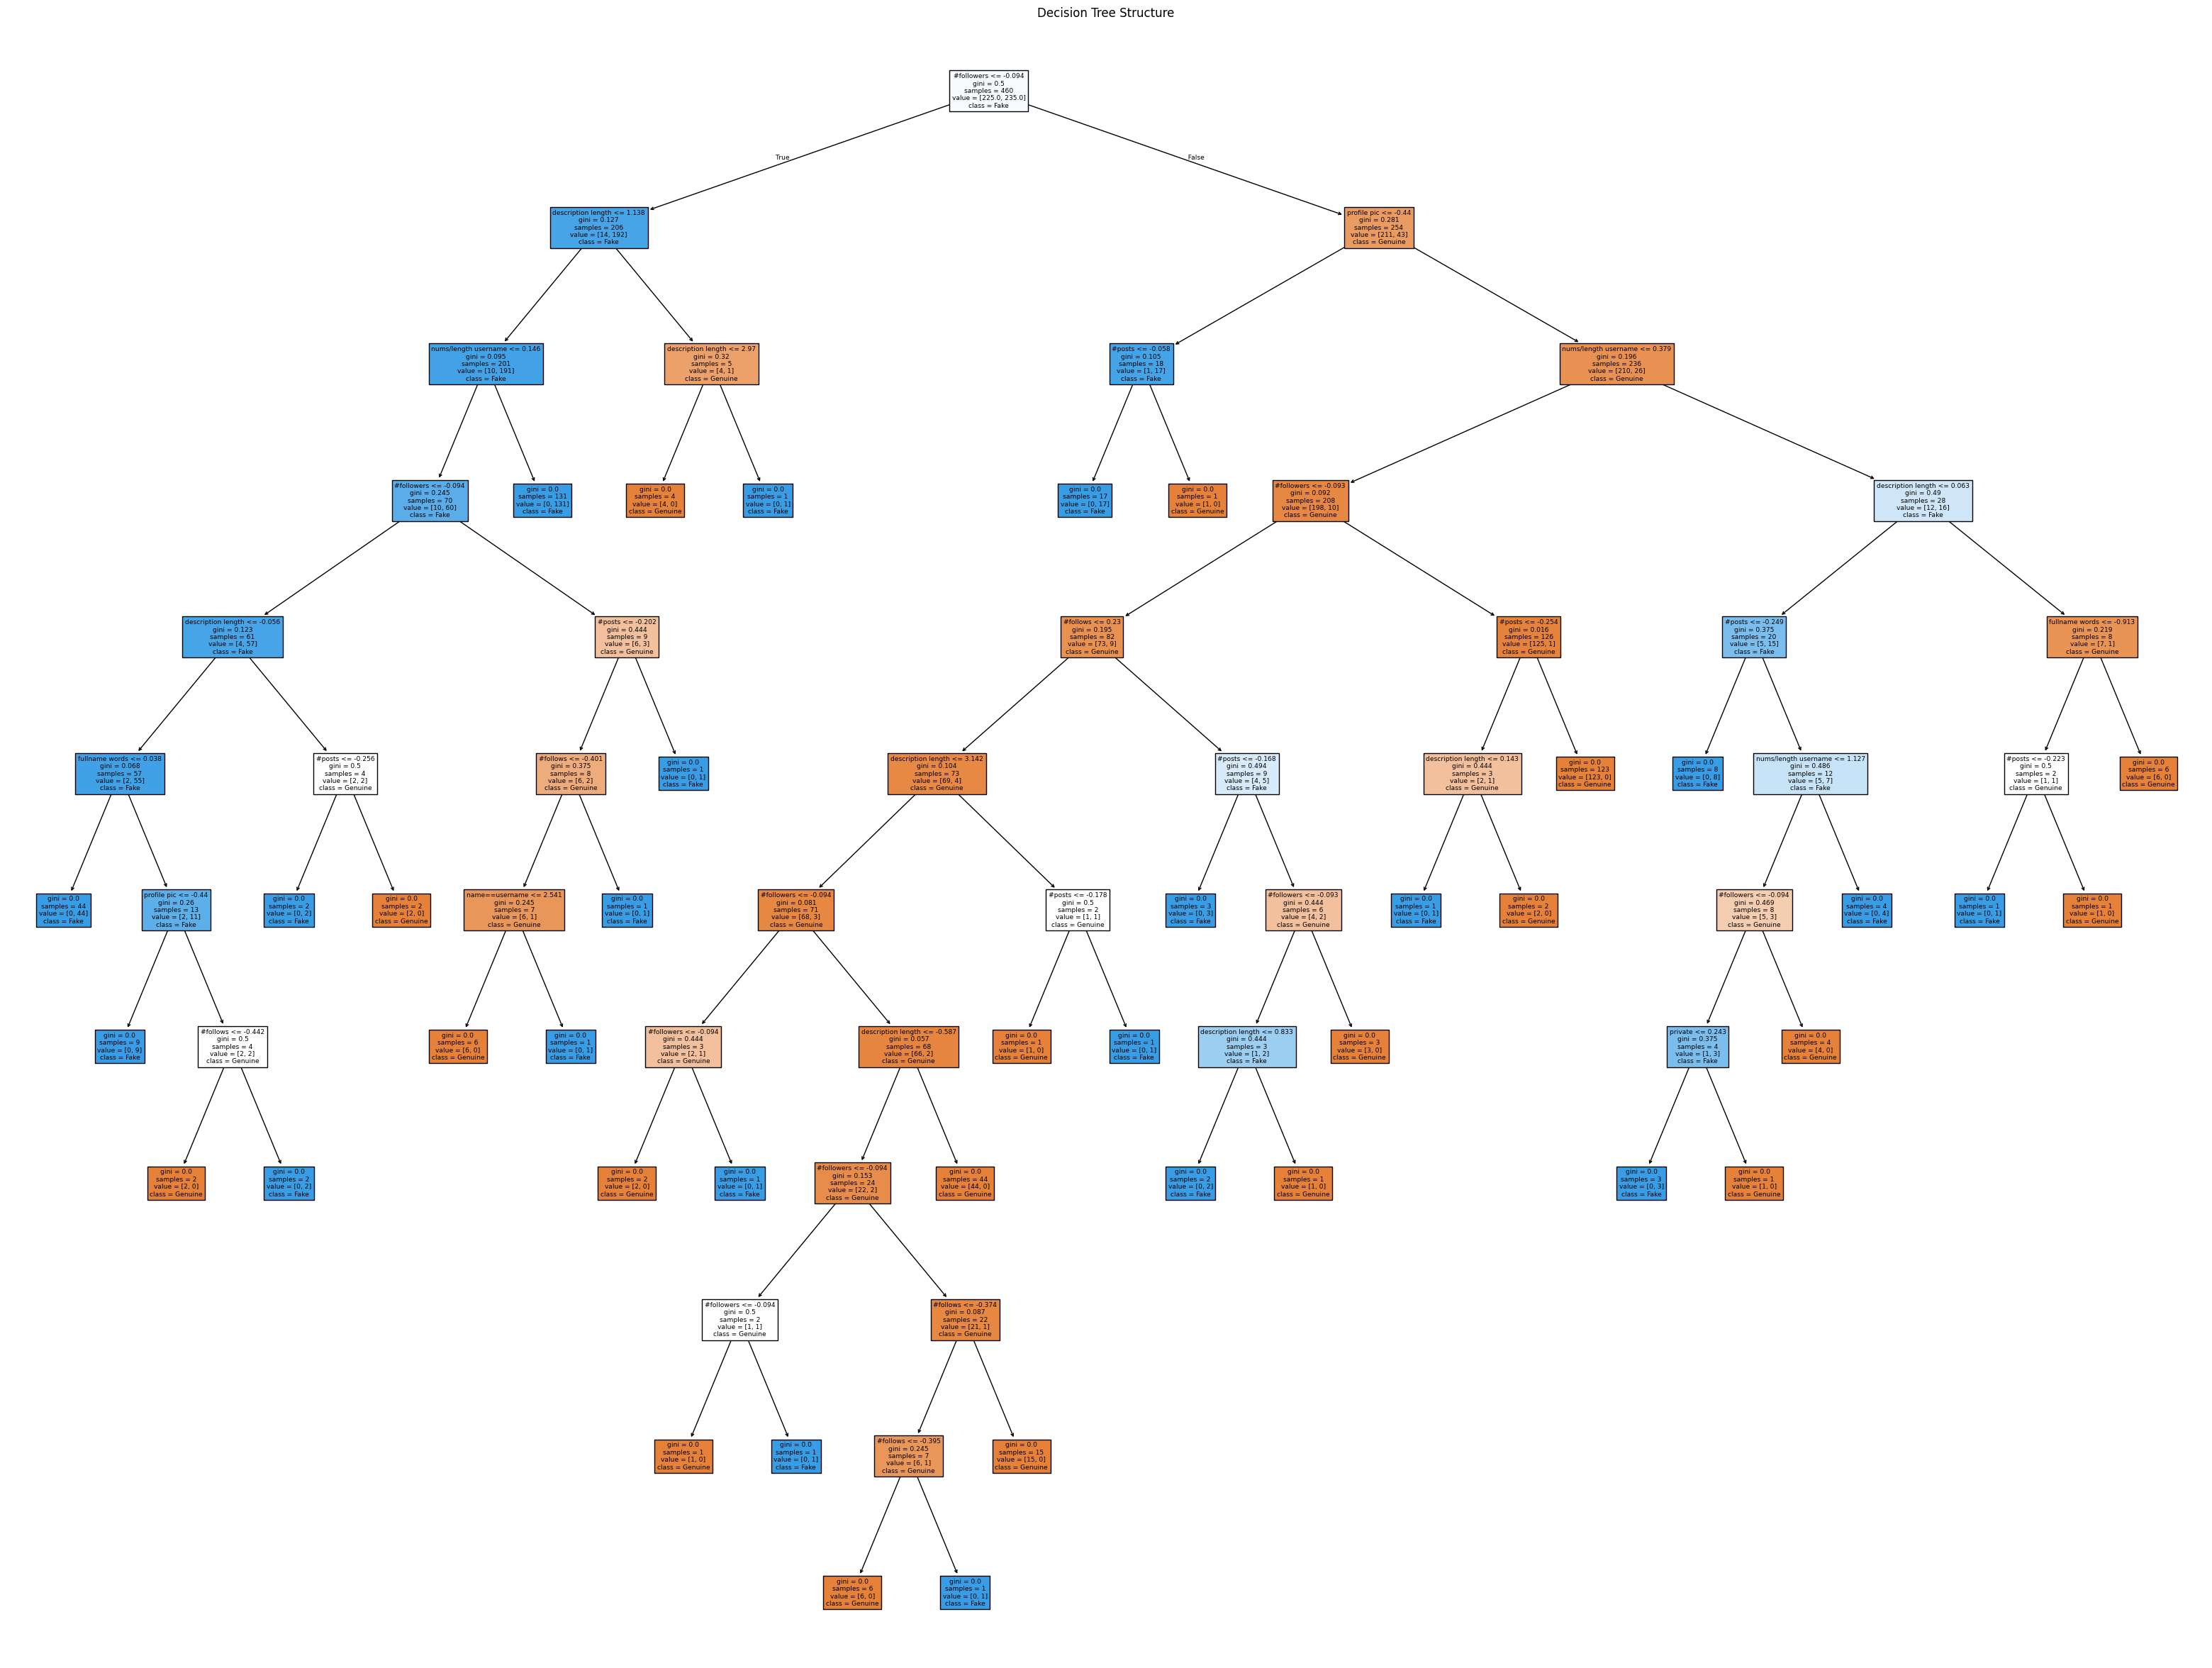

In [ ]:
plt.figure(figsize=(40,30))
tree.plot_tree(model, filled=True, feature_names=X.columns, class_names=['Genuine', 'Fake'])
plt.title("Decision Tree Structure")
plt.show()


**Feature Importnce**

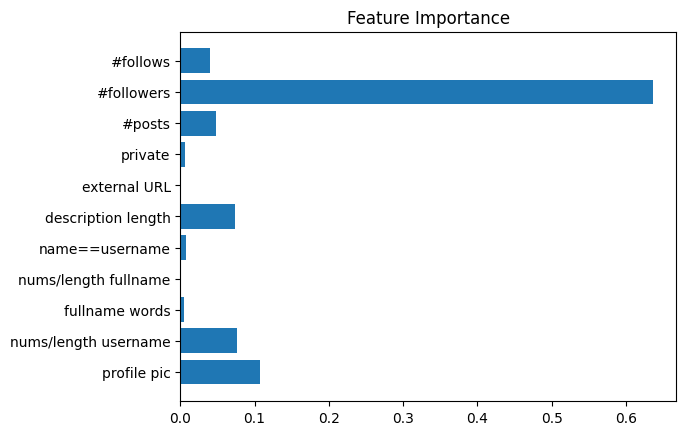

In [ ]:
importances = model.feature_importances_
plt.barh(X.columns, importances)
plt.title("Feature Importance")
plt.show()


**Test Data prediction**

In [ ]:
X_test = test_df.drop('fake', axis=1)
y_test = test_df['fake']

X_test_scaled = scaler.transform(X_test)
y_test_pred = model.predict(X_test_scaled)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [ ]:
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("Test Classification Report:\n", classification_report(y_test, y_test_pred))

Test Accuracy: 0.9333333333333333
Test Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93        60
           1       0.93      0.93      0.93        60

    accuracy                           0.93       120
   macro avg       0.93      0.93      0.93       120
weighted avg       0.93      0.93      0.93       120



Test Confusion Matrix:
 [[56  4]
 [ 4 56]]


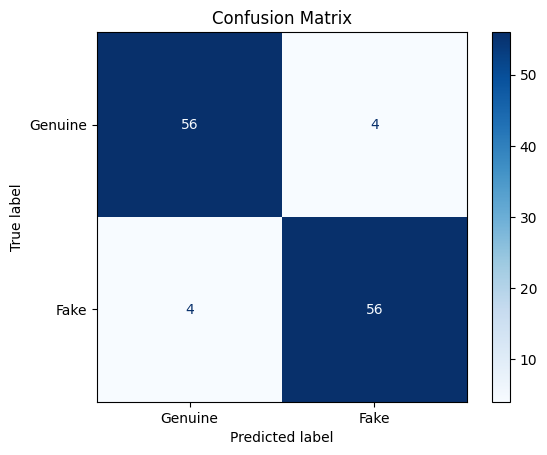

In [ ]:
print("Test Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred, display_labels=['Genuine', 'Fake'], cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

**Train a Random Forest Model**

In [ ]:
# Train the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on validation set
rf_pred = rf_model.predict(X_val)


In [ ]:
# Evaluation
print("Random Forest Accuracy:", accuracy_score(y_val, rf_pred))
print("Random Forest Classification Report:\n", classification_report(y_val, rf_pred))

Random Forest Accuracy: 0.9137931034482759
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.95      0.92        63
           1       0.94      0.87      0.90        53

    accuracy                           0.91       116
   macro avg       0.92      0.91      0.91       116
weighted avg       0.92      0.91      0.91       116



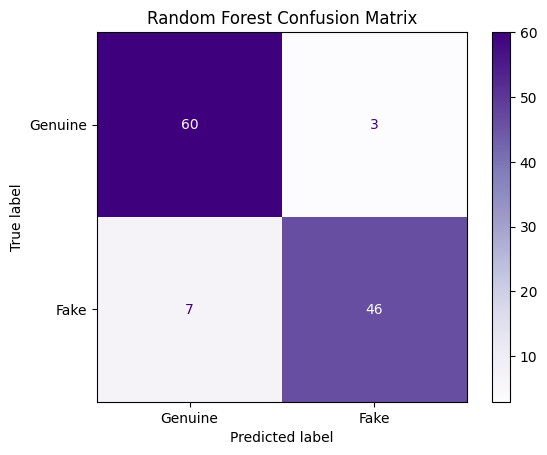

In [ ]:
# Confusion matrix
ConfusionMatrixDisplay.from_predictions(y_val, rf_pred, display_labels=['Genuine', 'Fake'], cmap='Purples')
plt.title("Random Forest Confusion Matrix")
plt.show()

**Feature Importance(Random forest)**

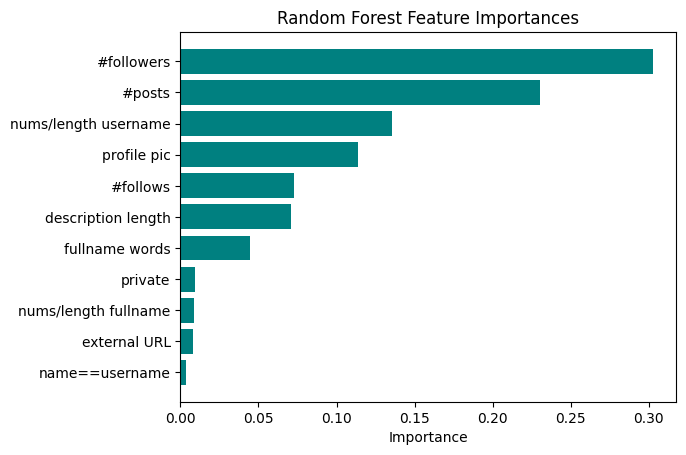

In [ ]:
rf_importances = rf_model.feature_importances_
sorted_idx = np.argsort(rf_importances)

plt.barh(X.columns[sorted_idx], rf_importances[sorted_idx], color='teal')
plt.title("Random Forest Feature Importances")
plt.xlabel("Importance")
plt.show()


**Final Prediction**

In [ ]:
# Scale the test set again using the same scaler
X_test_scaled = scaler.transform(X_test)

# Predict using Random Forest
rf_test_pred = rf_model.predict(X_test_scaled)

# Evaluation on test data
print("Test Accuracy (RF):", accuracy_score(y_test, rf_test_pred))
print("Test Classification Report (RF):\n", classification_report(y_test, rf_test_pred))

Test Accuracy (RF): 0.925
Test Classification Report (RF):
               precision    recall  f1-score   support

           0       0.92      0.93      0.93        60
           1       0.93      0.92      0.92        60

    accuracy                           0.93       120
   macro avg       0.93      0.93      0.92       120
weighted avg       0.93      0.93      0.92       120



/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Test Confusion Matrix (RF):
 [[56  4]
 [ 5 55]]


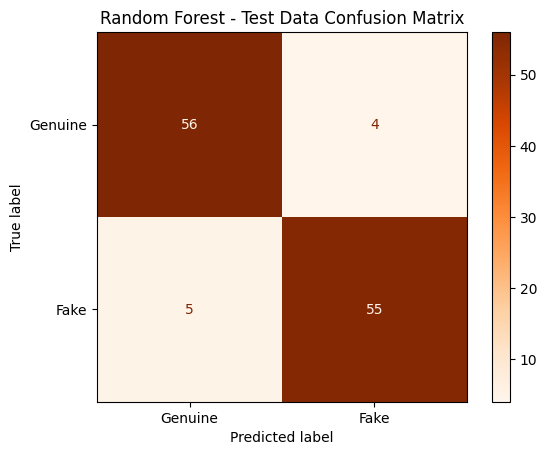

In [ ]:
print("Test Confusion Matrix (RF):\n", confusion_matrix(y_test, rf_test_pred))
# Confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, rf_test_pred, display_labels=['Genuine', 'Fake'], cmap='Oranges')
plt.title("Random Forest - Test Data Confusion Matrix")
plt.show()